In [1]:
# Load in modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump, load
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Read in data
data = load_breast_cancer(as_frame=True)
df = data['data']
df['label'] = pd.Categorical(np.where(data.target == 0, 'malignant', 'benign'))
print("Data shape: ", df.shape)
df.info()

Data shape:  (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    f

In [3]:
train_df, test_df = train_test_split(df, test_size=0.25, stratify=df.label, random_state=123)
train_df.shape, test_df.shape

((426, 31), (143, 31))

Train Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       267
   malignant       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.96      0.97        90
   malignant       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



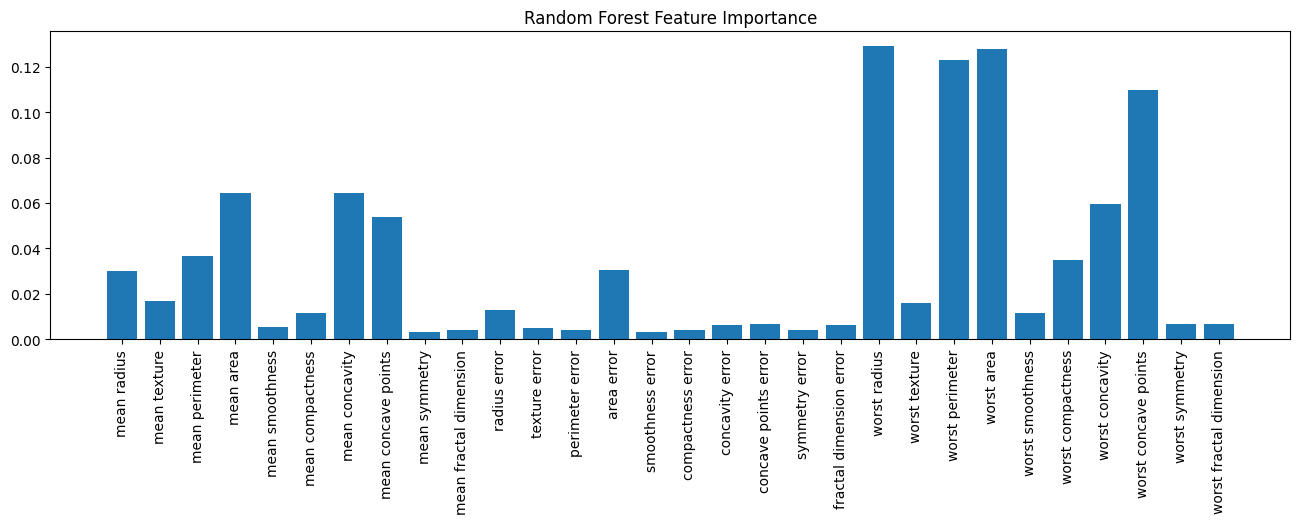

In [4]:
#lets fit a random forest and pull out feature importances
X_train, y_train = train_df.drop('label', axis=1), train_df['label']
X_test, y_test = test_df.drop('label', axis=1), test_df['label']
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Report:')
print(classification_report(y_train, rf.predict(X_train)))
print('Test Report:')
print(classification_report(y_test, rf.predict(X_test)))
plt.figure(figsize = (16,4))
plt.bar(rf.feature_names_in_, height = rf.feature_importances_,)
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importance')
plt.show()

In [5]:
# lets stick with the random forest and save it down
dump(rf, 'model.joblib') 

# load model back in to check it works
pl = load('model.joblib') 
print('Test Report:')
print(classification_report(y_test, pl.predict(X_test)))

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.96      0.97        90
   malignant       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [6]:
# sample predicton for use by the app:
test_df.iloc[:3,:-1].to_json('sample_predictions.json')